In [10]:
from tensorflow.keras.datasets import mnist

In [11]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
X_train.shape

(60000, 28, 28)

In [32]:
firt_value=X_train[0]

In [22]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

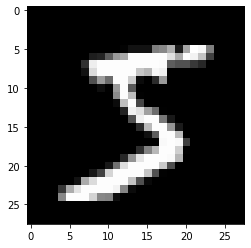

In [33]:
plt.imshow(firt_value,cmap='gray')

In [25]:
y_train # we need to encode 

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
y_train.shape # we see that we have continuous values

(60000,)

In [29]:
y_train_cat=to_categorical(y_train)

In [34]:
y_train_cat[0] # we see our firt value is 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [35]:
y_test_cat=to_categorical(y_test,num_classes=10)# make sure we have ten classes

In [37]:
X_train.max(),X_train.min()# we have to normalise the data

(255, 0)

In [52]:
X_train_scale=X_train/255
X_test_scale=X_test/255

In [57]:
X_train_scale=X_train_scale.reshape(60000,28,28,1)
X_test_scale=X_test_scale.reshape(X_test.shape[0],28,28,1)

In [56]:
X_train_scale.shape # batch size,width,height,color_channel

(60000, 28, 28, 1)

In [59]:
X_test_scale.shape

(10000, 28, 28, 1)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [79]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))


model.add(Dense(10,activation='softmax')) # multi class 

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               692352    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
stop=EarlyStopping(monitor='val_loss',patience=2)

In [82]:
model.fit(X_train_scale,y_train_cat,epochs=10,validation_data=(X_test_scale,y_test_cat),callbacks=[stop])

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.1415 - accuracy: 0.9581 - val_loss: 0.0643 - val_accuracy: 0.9783
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0506 - accuracy: 0.9847 - val_loss: 0.0481 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0325 - accuracy: 0.9901 - val_loss: 0.0452 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0445 - val_accuracy: 0.9843
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0141 - accuracy: 0.9956 - val_loss: 0.0436 - val_accuracy: 0.9867
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0403 - val_accuracy: 0.9882
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0496 -

In [83]:
metrics=pd.DataFrame(model.history.history)

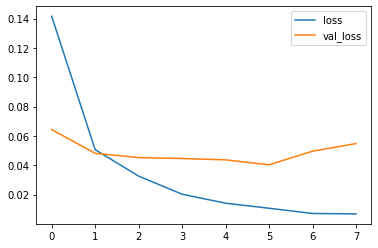

In [86]:
metrics[['loss','val_loss']].plot()

In [87]:
model.evaluate(X_test_scale,y_test_cat)

313/313 [==============================] - 2s 7ms/step - loss: 0.0547 - accuracy: 0.9861


[0.05474716052412987, 0.9861000180244446]

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [101]:
prediction=model.predict(X_test_scale)

In [102]:
prediction[0]

array([4.5906978e-16, 2.7302110e-12, 9.6164167e-11, 3.9795112e-11,
       1.1976164e-13, 2.5278294e-14, 1.0161128e-21, 1.0000000e+00,
       7.0942961e-12, 2.0972149e-11], dtype=float32)

In [103]:
y_pred=np.argmax(prediction,axis=1)
y_true=np.argmax(y_test_cat,axis=1)

In [104]:
print(classification_report(y_pred,y_true))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       978
           1       1.00      0.99      0.99      1143
           2       0.98      0.99      0.98      1023
           3       0.99      0.99      0.99      1009
           4       0.99      0.99      0.99       983
           5       0.99      0.98      0.98       902
           6       0.99      0.98      0.98       972
           7       0.99      0.98      0.98      1038
           8       0.97      0.99      0.98       962
           9       0.97      0.99      0.98       990

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [105]:
my_number=X_test_scale[8]

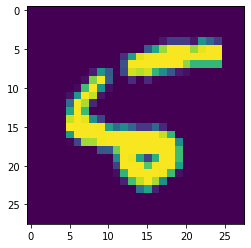

In [109]:
plt.imshow(my_number.reshape(28,28))

In [114]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)))

5